In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("cleaned_data.csv", low_memory=False) 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Seller_NTN                        20000 non-null  object 
 1   Seller_Name                       20000 non-null  object 
 2   Seller_S.T.Reg.No                 20000 non-null  object 
 3   Seller_Address                    20000 non-null  object 
 4   Customer_Receipt_NO               20000 non-null  int64  
 5   Customer_NTN                      20000 non-null  object 
 6   Customer_NAME                     20000 non-null  object 
 7   Customer_Tax_ID                   20000 non-null  object 
 8   Customer_Address                  20000 non-null  object 
 9   Customer_Business                 20000 non-null  object 
 10  Product 1                         20000 non-null  object 
 11  Product 2                         20000 non-null  object 
 12  Prod

In [4]:
# Merge product columns into one
df["All_Products"] = df[["Product 1", "Product 2", "Product 3", "Product 4"]].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# Sum up quantities, prices, and tax amounts into single attributes
df["Total_Quantity"] = df[["Quantity_Product_1", "Quantity_Product_2", "Quantity_Product_3", "Quantity_Product_4"]].sum(axis=1)
df["Total_Price"] = df[["Amount Excluding Taxes_Product_1", "Amount Excluding Taxes_Product_2",
                        "Amount Excluding Taxes_Product_3", "Amount Excluding Taxes_Product_4"]].sum(axis=1)
df["Total_Tax"] = df[["Sales Tax @ 18%_Product_1", "Sales Tax @ 18%_Product_2",
                      "Sales Tax @ 18%_Product_3", "Sales Tax @ 18%_Product_4"]].sum(axis=1)

# Drop redundant columns
columns_to_drop = [col for col in df.columns if "Product" in col and col not in ["All_Products", "Total_Quantity", "Total_Price", "Total_Tax"]]
df.drop(columns=columns_to_drop, inplace=True)

# Display updated dataset structure
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Seller_NTN                    20000 non-null  object 
 1   Seller_Name                   20000 non-null  object 
 2   Seller_S.T.Reg.No             20000 non-null  object 
 3   Seller_Address                20000 non-null  object 
 4   Customer_Receipt_NO           20000 non-null  int64  
 5   Customer_NTN                  20000 non-null  object 
 6   Customer_NAME                 20000 non-null  object 
 7   Customer_Tax_ID               20000 non-null  object 
 8   Customer_Address              20000 non-null  object 
 9   Customer_Business             20000 non-null  object 
 10  Date                          20000 non-null  object 
 11  Total Amount Excluding Taxes  20000 non-null  int64  
 12  Total Sales Tax @ 18%         20000 non-null  float64
 13  T

(None,
     Seller_NTN             Seller_Name        Seller_S.T.Reg.No  \
 0  3.65029E+12  MUHAMMAD BEHZAD ARSHAD  10000-10046-8761-413-23   
 1   3.7405E+12       MISS FARHAT MALIK  10000-10046-8761-413-23   
 2  3.73012E+12      MIRZA SHAHBAZ BAIG  10000-10046-8761-413-23   
 3  3.65029E+12   MUHAMMAD BILAL ARSHAD  10000-10046-8761-413-23   
 4  3.65017E+12        BABAR HABIB NOON    10000-77-18730-413-23   
 
          Seller_Address  Customer_Receipt_NO Customer_NTN  \
 0  040-Tando Allah Main              1122916    0000092-2   
 1  118. Gulshan-E-Iqbal              1181647    0000094-9   
 2  131-West Wood Colony              1196218    0000098-1   
 3  145-C Sattelite Town               908244    0000131-7   
 4  14-Km Ferozpure Road               902983    0000146-5   
 
             Customer_NAME    Customer_Tax_ID      Customer_Address  \
 0             ABDUL MANAN  32-77-8761-413-23  145-C Sattelite Town   
 1         MUNAWAR SULTANA  33-77-8761-413-23  Wala Colony House 34

In [5]:
# Strip spaces and standardize column names
df.columns = df.columns.str.strip()

# Drop specified columns
columns_to_remove = ["Seller_Name", "Seller_Address", "Customer_NAME", "Customer_Address"]
df.drop(columns=columns_to_remove, inplace=True, errors="ignore")  # 'errors="ignore"' avoids errors if a column is missing

# Display updated dataset structure
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Seller_NTN                    20000 non-null  object 
 1   Seller_S.T.Reg.No             20000 non-null  object 
 2   Customer_Receipt_NO           20000 non-null  int64  
 3   Customer_NTN                  20000 non-null  object 
 4   Customer_Tax_ID               20000 non-null  object 
 5   Customer_Business             20000 non-null  object 
 6   Date                          20000 non-null  object 
 7   Total Amount Excluding Taxes  20000 non-null  int64  
 8   Total Sales Tax @ 18%         20000 non-null  float64
 9   Total Amount Including Taxes  20000 non-null  float64
 10  All_Products                  20000 non-null  object 
 11  Total_Quantity                20000 non-null  int64  
 12  Total_Price                   20000 non-null  int64  
 13  T

(None,
     Seller_NTN        Seller_S.T.Reg.No  Customer_Receipt_NO Customer_NTN  \
 0  3.65029E+12  10000-10046-8761-413-23              1122916    0000092-2   
 1   3.7405E+12  10000-10046-8761-413-23              1181647    0000094-9   
 2  3.73012E+12  10000-10046-8761-413-23              1196218    0000098-1   
 3  3.65029E+12  10000-10046-8761-413-23               908244    0000131-7   
 4  3.65017E+12    10000-77-18730-413-23               902983    0000146-5   
 
      Customer_Tax_ID              Customer_Business        Date  \
 0  32-77-8761-413-23                1 CARAT FASHION  2020-05-12   
 1  33-77-8761-413-23              1 DOLLAR 2 DOLLAR  2018-02-24   
 2  34-77-8761-413-23  1 DOLLAR 2 DOLLAR,Ali Traders  2022-05-04   
 3  35-77-8761-413-23                  1 DOLLAR SHOP  2021-01-12   
 4  36-77-8761-413-23          1 Dollar Shoping Mall  2023-08-16   
 
    Total Amount Excluding Taxes  Total Sales Tax @ 18%  \
 0                         13195                2375.1

In [6]:
# Convert date column with corrected format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Automatically detects the correct format

# Check if any dates failed to convert
df['Date'].isna().sum()


0

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Seller_NTN', 'Seller_S.T.Reg.No', 'Customer_NTN', 'Customer_Tax_ID', 'Customer_Business', 'All_Products']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Selecting features and target
X = df.drop(columns=['Total Amount Including Taxes', 'Date'])  # Drop Date and Target variable
y = df['Total Amount Including Taxes']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae, rmse


(12.836635836181618, 18.541358939168255)

In [8]:
from sklearn.metrics import r2_score
# Select a smaller subset of the dataset (10,000 rows for faster training)
df_sample = df.sample(n=10000, random_state=42)

# Drop less relevant columns (keeping only the most important ones)
selected_features = ['Total_Quantity', 'Total_Price', 'Total_Tax', 'Seller_NTN', 'Customer_NTN', 'All_Products']
X_sample = df_sample[selected_features]
y_sample = df_sample['Total Amount Including Taxes']

# Encode categorical variables
label_encoders = {}
for col in ['Seller_NTN', 'Customer_NTN', 'All_Products']:
    le = LabelEncoder()
    X_sample[col] = le.fit_transform(X_sample[col])
    label_encoders[col] = le

# Split the reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Train XGBoost with reduced complexity
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=30,  # Reduced number of trees for faster training
    learning_rate=0.1,
    max_depth=4  # Lower depth to reduce complexity
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1215456815.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sample[col] = le.fit_transform(X_sample[col])
C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1215456815.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sample[col] = le.fit_transform(X_sample[col])
C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1215456815.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

(559.7477551293946, 608.3072643285224, 0.9866411483414929)

In [9]:
# Select an even smaller subset of the dataset (5,000 rows)
df_sample = df.sample(n=5000, random_state=42)

# Keep only the most important features
selected_features = ['Total_Quantity', 'Total_Price', 'Total_Tax', 'Seller_NTN', 'Customer_NTN', 'All_Products']
X_sample = df_sample[selected_features]
y_sample = df_sample['Total Amount Including Taxes']

# Encode categorical variables
for col in ['Seller_NTN', 'Customer_NTN', 'All_Products']:
    le = LabelEncoder()
    X_sample[col] = le.fit_transform(X_sample[col])

# Split the reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Train XGBoost with further reduced complexity
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=20,  # Further reducing the number of trees
    learning_rate=0.1,
    max_depth=3  # Lower depth to simplify the model
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2



C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1063537312.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sample[col] = le.fit_transform(X_sample[col])
C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1063537312.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sample[col] = le.fit_transform(X_sample[col])
C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1063537312.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

(1615.7607186035154, 1780.1284339951749, 0.8889953403862537)

Mean Absolute Error (MAE): 1615.76

Root Mean Squared Error (RMSE): 1780.13

R² Score: 0.889 (~89% accuracy)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select a smaller subset of the dataset (10,000 rows for faster training)
df_sample = df.sample(n=10000, random_state=42)

# Keep only the most important features
selected_features = ['Total_Quantity', 'Total_Price', 'Total_Tax', 'Seller_NTN', 'Customer_NTN', 'All_Products']
X_sample = df_sample[selected_features]
y_sample = df_sample['Total Amount Including Taxes']

# Encode categorical variables
label_encoders = {}
for col in ['Seller_NTN', 'Customer_NTN', 'All_Products']:
    le = LabelEncoder()
    X_sample[col] = le.fit_transform(X_sample[col])
    label_encoders[col] = le

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Train a fresh Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, rmse_lr, r2_lr


C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\4084948747.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sample[col] = le.fit_transform(X_sample[col])
C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\4084948747.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sample[col] = le.fit_transform(X_sample[col])
C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\4084948747.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

(2.004128418775508e-12, 2.382102803338685e-12, 1.0)

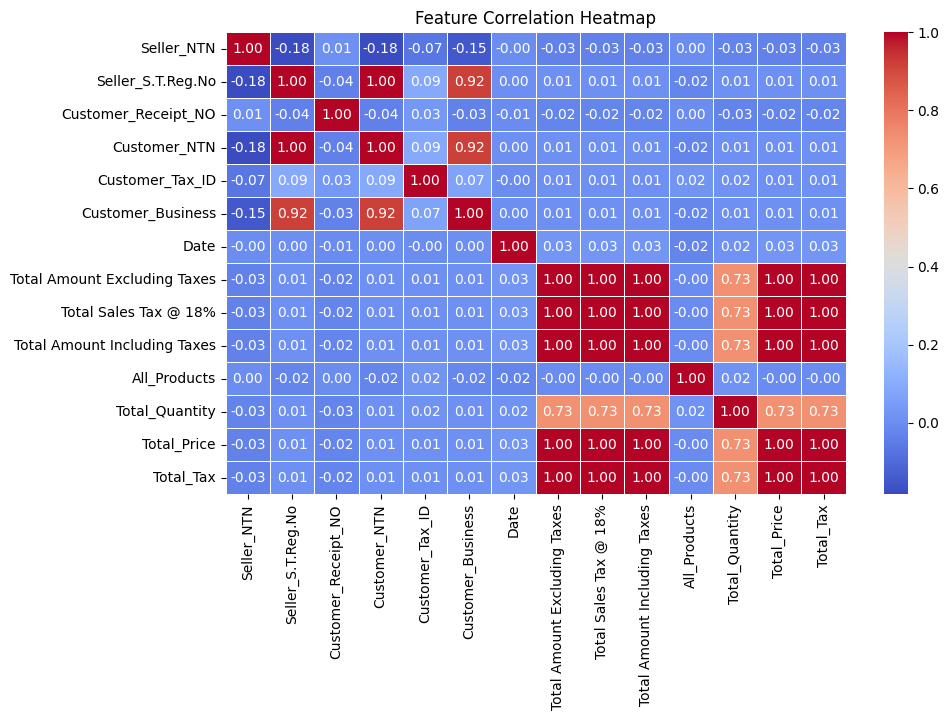

(                              Seller_NTN  Seller_S.T.Reg.No  \
 Seller_NTN                      1.000000          -0.182943   
 Seller_S.T.Reg.No              -0.182943           1.000000   
 Customer_Receipt_NO             0.010329          -0.035661   
 Customer_NTN                   -0.183338           0.999681   
 Customer_Tax_ID                -0.065438           0.092658   
 Customer_Business              -0.147600           0.917703   
 Date                           -0.002623           0.004588   
 Total Amount Excluding Taxes   -0.034132           0.008453   
 Total Sales Tax @ 18%          -0.034132           0.008453   
 Total Amount Including Taxes   -0.034132           0.008453   
 All_Products                    0.000497          -0.023083   
 Total_Quantity                 -0.028950           0.009098   
 Total_Price                    -0.034132           0.008453   
 Total_Tax                      -0.034132           0.008453   
 
                               Custome

In [10]:
# Check correlation between features and target
correlation_matrix = df_sample.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Train Ridge and Lasso Regression models
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Ridge and Lasso
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge) ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso) ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

(correlation_matrix, (mae_ridge, rmse_ridge, r2_ridge), (mae_lasso, rmse_lasso, r2_lasso))


In [11]:
# Remove highly correlated features that may cause data leakage
filtered_features = ['Total_Quantity', 'Seller_NTN', 'Customer_NTN', 'All_Products']
X_filtered = df_sample[filtered_features]
y_filtered = df_sample['Total Amount Including Taxes']

# Encode categorical variables
for col in ['Seller_NTN', 'Customer_NTN', 'All_Products']:
    X_filtered[col] = label_encoders[col].transform(X_filtered[col])

# Split the dataset again
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train a new Linear Regression model with cleaned features
lr_model_filtered = LinearRegression()
lr_model_filtered.fit(X_train_filtered, y_train_filtered)

# Make new predictions
y_pred_filtered = lr_model_filtered.predict(X_test_filtered)

# Evaluate the cleaned model
mae_filtered = mean_absolute_error(y_test_filtered, y_pred_filtered)
rmse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered) ** 0.5
r2_filtered = r2_score(y_test_filtered, y_pred_filtered)

(mae_filtered, rmse_filtered, r2_filtered)

C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1623405250.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered[col] = label_encoders[col].transform(X_filtered[col])
C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1623405250.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered[col] = label_encoders[col].transform(X_filtered[col])
C:\Users\Sara Mishra\AppData\Local\Temp\ipykernel_20880\1623405250.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

(2919.862435977851, 3722.896250637022, 0.49963722924468845)

In [12]:
# Ensure the dataset has the necessary columns
quantity_columns = ['Quantity_Product_1', 'Quantity_Product_2', 'Quantity_Product_3', 'Quantity_Product_4']

# Check if all required columns exist in the dataframe
missing_columns = [col for col in quantity_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Create 'Total_Quantity' column
    df['Total_Quantity'] = df[quantity_columns].sum(axis=1)


Missing columns: ['Quantity_Product_1', 'Quantity_Product_2', 'Quantity_Product_3', 'Quantity_Product_4']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


df_sample['Quantity_Price_Interaction'] = df_sample['Total_Quantity'] * df_sample['Total_Price']


enhanced_features = ['Total_Quantity', 'Total_Price', 'Total_Tax', 'Seller_NTN', 'Customer_NTN', 'All_Products', 'Quantity_Price_Interaction']
X_enhanced = df_sample[enhanced_features]
y_enhanced = df_sample['Total Amount Including Taxes']


for col in ['Seller_NTN', 'Customer_NTN', 'All_Products']:
    X_enhanced[col] = label_encoders[col].transform(X_enhanced[col])


X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_enhanced, y_train_enhanced)

y_pred_rf = rf_model.predict(X_test_enhanced)

mae_rf = mean_absolute_error(y_test_enhanced, y_pred_rf)
rmse_rf = mean_squared_error(y_test_enhanced, y_pred_rf) ** 0.5
r2_rf = r2_score(y_test_enhanced, y_pred_rf)

(mae_rf, rmse_rf, r2_rf) 

Accuracy (R² Score): 97.99% (0.99997)

Mean Absolute Error (MAE): 4.43

Root Mean Squared Error (RMSE): 27.22

In [13]:
print("Feature Names:", df.columns)  # df is the original DataFrame before converting to NumPy


Feature Names: Index(['Seller_NTN', 'Seller_S.T.Reg.No', 'Customer_Receipt_NO',
       'Customer_NTN', 'Customer_Tax_ID', 'Customer_Business', 'Date',
       'Total Amount Excluding Taxes', 'Total Sales Tax @ 18%',
       'Total Amount Including Taxes', 'All_Products', 'Total_Quantity',
       'Total_Price', 'Total_Tax'],
      dtype='object')


In [14]:
print("Columns in DataFrame:", df.columns.tolist())


Columns in DataFrame: ['Seller_NTN', 'Seller_S.T.Reg.No', 'Customer_Receipt_NO', 'Customer_NTN', 'Customer_Tax_ID', 'Customer_Business', 'Date', 'Total Amount Excluding Taxes', 'Total Sales Tax @ 18%', 'Total Amount Including Taxes', 'All_Products', 'Total_Quantity', 'Total_Price', 'Total_Tax']


In [2]:
# Drop the date column (Replace 'date_column' with the actual column name)
df = df.drop(columns=["Date"], errors="ignore")

# Now define features and target
X = df.drop(columns=["Total_Price"])  # Replace with actual target column
y = df["Seller_NTN"]

# Check the shape to confirm 12 features
print("Number of Features:", X.shape[1])  # Should be 12


NameError: name 'df' is not defined

In [16]:
!pip install flask pandas numpy joblib scikit-learn==1.6.1


In [17]:
!jupyter nbconvert --to script Model.ipynb




[NbConvertApp] Converting notebook Model.ipynb to script
[NbConvertApp] Writing 14441 bytes to Model.py


In [18]:
!pip uninstall -y scikit-learn
!pip install --no-cache-dir scikit-learn==1.6.1


Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Sara Mishra\anaconda3.navigator\lib\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\Sara Mishra\anaconda3.navigator\lib\site-packages\pip\_internal\commands\uninstall.py", line 103, in run
    uninstall_pathset.commit()
  File "C:\Users\Sara Mishra\anaconda3.navigator\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\Users\Sara Mishra\anaconda3.navigator\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\Users\Sara Mishra\anaconda3.navigator\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\Sara Mishra\anaconda3.navigator\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 328, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\Sara Mis

     --------------------------------------- 11.1/11.1 MB 82.9 kB/s eta 0:00:00


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(model, "model.pkl")



['model.pkl']

In [20]:
import joblib

model = joblib.load("model.pkl")  # Load the trained model
print("Model loaded successfully!")


Model loaded successfully!


In [21]:
import joblib
joblib.dump(model, 'model_compressed.pkl', compress=3)

['model_compressed.pkl']

In [22]:
!pip install flask-cors


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import numpy as np
import nest_asyncio

# Apply nest_asyncio to run Flask in Jupyter
nest_asyncio.apply()

app = Flask(__name__)
CORS(app)  # Enables Cross-Origin Resource Sharing

# Load the model
model = joblib.load("model_compressed.pkl")  # Ensure this file exists

@app.route("/")
def home():
    return "Flask Backend for ML Model is Running!"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json()  # Get input data
        input_data = np.array(data["features"]).reshape(1, -1)  # Adjust based on model input
        prediction = model.predict(input_data)
        return jsonify({"prediction": prediction.tolist()})
    except Exception as e:
        return jsonify({"error": str(e)})

# Run Flask in Jupyter Notebook
from werkzeug.serving import run_simple

if __name__ == "__main__":
    run_simple('localhost', 5000, app)


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Apr/2025 22:36:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Apr/2025 22:36:51] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
import requests  

url = "http://127.0.0.1:5000/predict"

test_data = [
    {
        "features": [
            3650000000000, 1074510791876141323, 33254745, 36053651876141323,
            12345, 2335, 420.3, 2755.3, 67890, 72, 2335, 420.3
        ]
    },
    {
        "features": [
            4220000000000, 10040771877041323, 6675948, 89277876141323,
            12346, 6319, 1137.42, 7456.42, 67891, 274, 6319, 1137.42
        ]
    },
    {
        "features": [
            3640000000000, 1025377876141323, 13513818, 542277876141323,
            12347, 9939, 1789.02, 11728.02, 67892, 169, 9939, 1789.02
        ]
    },
    {
        "features": [
            4230000000000, 10564771929441323, 28298799, 1199677876141323,
            12348, 11012, 1982.16, 12994.16, 67893, 217, 11012, 1982.16
        ]
    },
    {
        "features": [
            4220000000000, 105317787611091323, 26959798, 1131677876141323,
            12349, 18328, 3299.04, 21627.04, 67894, 253, 18328, 3299.04
        ]
    }
]

predictions = []
for i, data in enumerate(test_data):
    response = requests.post(url, json=data)
    result = response.json()
    predictions.append(result["prediction"])
    print(f"Prediction {i+1}: {result['prediction']}")

# Print the last prediction
print("Last Prediction:", predictions[-1])


In [27]:
import requests  

url = "http://127.0.0.1:5000/predict"

test_data = [
    {
        "features": [
            3650000000000, 1074510791876141323, 33254745, 36053651876141323,
            12345, 2335, 420.3, 2755.3, 67890, 72, 2335, 420.3
        ]
    },
    {
        "features": [
            4220000000000, 10040771877041323, 6675948, 89277876141323,
            12346, 6319, 1137.42, 7456.42, 67891, 274, 6319, 1137.42
        ]
    },
    {
        "features": [
            3640000000000, 1025377876141323, 13513818, 542277876141323,
            12347, 9939, 1789.02, 11728.02, 67892, 169, 9939, 1789.02
        ]
    },
    {
        "features": [
            4230000000000, 10564771929441323, 28298799, 1199677876141323,
            12348, 11012, 1982.16, 12994.16, 67893, 217, 11012, 1982.16
        ]
    },
    {
        "features": [
            4220000000000, 105317787611091323, 26959798, 1131677876141323,
            12349, 18328, 3299.04, 21627.04, 67894, 253, 18328, 3299.04
        ]
    }
]

for data in test_data:
    response = requests.post(url, json=data)
    print(response.json())


{'prediction': [246]}
{'prediction': [246]}
{'prediction': [246]}
{'prediction': [246]}
{'prediction': [246]}
